In [1]:
using AutomotiveDrivingModels
using AutoViz
include("example_2d_driver.jl")
include("example_lane_changer.jl")

((roadway[1]).lanes[1]).curve = CurvePt{Float64}[CurvePt({0.000, 0.000, 0.000}, 0.000, NaN, NaN), CurvePt({300.000, 0.000, 0.000}, 300.000, NaN, NaN)]
get_posG(car.state.posF, roadway) = VecSE2({30.000, 9.000}, 0.000)


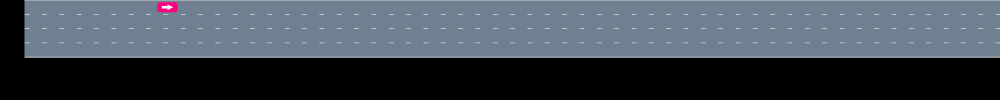

In [2]:
nlanes = 4
road_length = 300.0 # [meters]
roadway = gen_straight_roadway(nlanes, road_length)

# Define car state
posG = VecSE2(30.0, 0.0, 0.0)
v = 10.0
lanetag = LaneTag(1,4) # 1st (and only currently) road segment and 2nd lane
# lanetag = roadway[1].lanes[2].tag
curve = roadway[1].lanes[1].curve
lane= Lane(lanetag, curve)
posF = Frenet(posG, lane, roadway)

car_initial_state = VehicleState(posF, roadway, v)
car = Vehicle(car_initial_state, VehicleDef(), 1)
@show roadway[1].lanes[1].curve
lane = get_lane(roadway, car)
# @show lane.tag
@show get_posG(car.state.posF, roadway)
# car.state.posF.roadind.tag = LaneTag(1,2)
scene = Scene()
push!(scene, car)

cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)

In [3]:
scene = Scene()

# car 1 - lane 1
posG1 = VecSE2(60.0, 0.0, 0.0)
posF1 = Frenet(posG1, Lane(LaneTag(1,1), curve), roadway)
v1 = 15.0
initial_state_1 = VehicleState(posF1, roadway, v1)
car1 = Vehicle(initial_state_1, VehicleDef(), 1)

# car 2 - lane 2
posG2 = VecSE2(80.0, 0.0, 0.0)
posF2 = Frenet(posG2, Lane(LaneTag(1,2), curve), roadway)
v2 = 18.0
initial_state_2 = VehicleState(posF2, roadway, v2)
car2 = Vehicle(initial_state_2, VehicleDef(), 2)

# car 3 - lane 3
posG3 = VecSE2(40.0, 0.0, 0.0)
posF3 = Frenet(posG3, Lane(LaneTag(1,3), curve), roadway)
v3 = 10.0
initial_state_3 = VehicleState(posF3, roadway, v3)
car3 = Vehicle(initial_state_3, VehicleDef(), 3)

# car 4 - lane 4
posG4 = VecSE2(100.0, 0.0, 0.0)
posF4 = Frenet(posG4, Lane(LaneTag(1,4), curve), roadway)
v4 = 10.0
initial_state_4 = VehicleState(posF4, roadway, v4)
car4 = Vehicle(initial_state_4, VehicleDef(), 4)

# introduce 2d driver model position (hope is that it exhibits lane-changing maneuvers)
posG5 = VecSE2(5.0, 0.0, 0.0)
posF5 = Frenet(posG5, Lane(LaneTag(1,3), curve), roadway)
v5 = 45.0
initial_state_5 = VehicleState(posF5, roadway, v5)
car5 = Vehicle(initial_state_5, VehicleDef(), 5)

push!(scene, car1)
push!(scene, car2)
push!(scene, car3)
push!(scene, car4)
push!(scene, car5)

Scene(with 5 cars)

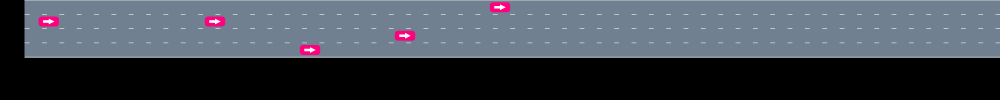

In [4]:
cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)

In [5]:
# Define driving models
models = Dict{Int, DriverModel}()
models[1] = IntelligentDriverModel(v_des=car1.state.v) # go at same speed for time being
models[2] = IntelligentDriverModel(v_des=car2.state.v)
models[3] = IntelligentDriverModel(v_des=car3.state.v)
models[4] = IntelligentDriverModel(v_des=car4.state.v)
models[5] = Example2DDriver(0.1)

Example2DDriver(SceneRecord(nscenes=0), IntelligentDriverModel
  a: Float64 NaN
  σ: Float64 NaN
  k_spd: Float64 1.0
  δ: Float64 4.0
  T: Float64 1.5
  v_des: Float64 29.0
  s_min: Float64 5.0
  a_max: Float64 3.0
  d_cmf: Float64 2.0
  d_max: Float64 9.0
, ProportionalLaneTracker(NaN, NaN, 3.0, 2.0), ExampleLaneChanger(0, SceneRecord(nscenes=0), 29.0, 50.0, 10.0, 10.0))

In [6]:
# make simulation
timestep = 0.1
nticks = 100
scenes = simulate!(scene, roadway, models, nticks, timestep)

101-element Array{Frame{Entity{VehicleState,VehicleDef,Int64}},1}:
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 ⋮                 
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)
 Scene(with 5 cars)

In [7]:
using Reel
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, cam=FitToContentCamera(0.0))
    duration =length(scenes)*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 2 methods)

In [8]:
duration, fps, render_hist = animate_record(scenes, timestep, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("example_lane_change.mp4", film)

"example_lane_change.mp4"